Customer Churn Analysis

Problem Statement:
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing data from csv file
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#reading the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the shape of data
df.shape

(7043, 21)

In [5]:
#checking for null values in the data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#checking value colunts for unique values of target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
#converting the target variables into integer
df['Churn']=df['Churn'].replace('No',0)
df['Churn']=df['Churn'].replace('Yes',1)

In [9]:
#display maximum columns
pd.set_option('display.max_column',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
#dropping the customer id because there are many unique values
df.drop(['customerID'],axis=1,inplace=True)

In [11]:
#checking correlation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


<AxesSubplot:>

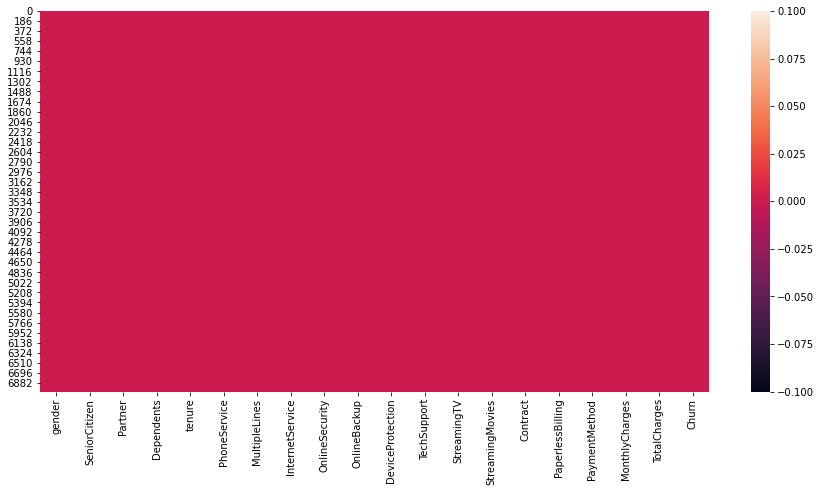

In [12]:
#plotting the heatmap to show is there any null values
plt.figure(figsize=[15,7])
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='gender', ylabel='count'>

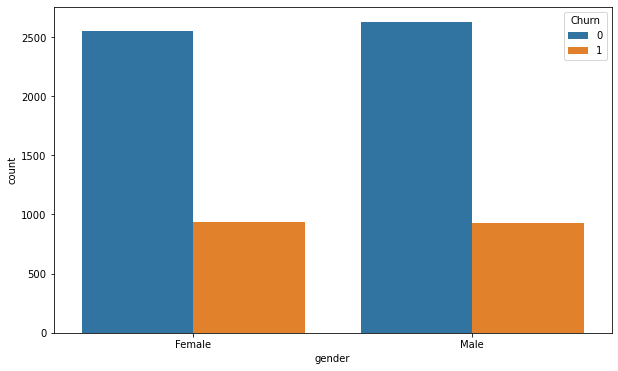

In [13]:
#making countplot to show the relation between churn and gender
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='Churn',data=df)

male and female having approx same rate of churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

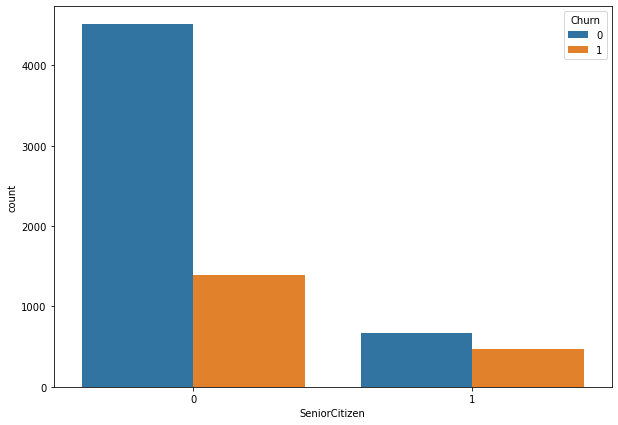

In [14]:
#making countplot to show the relation between churn and ssenior citizen
plt.figure(figsize=(10,7))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")

churn rate in senior citizen is almost same

non senior citizen having more chances of churn

<AxesSubplot:xlabel='Partner', ylabel='count'>

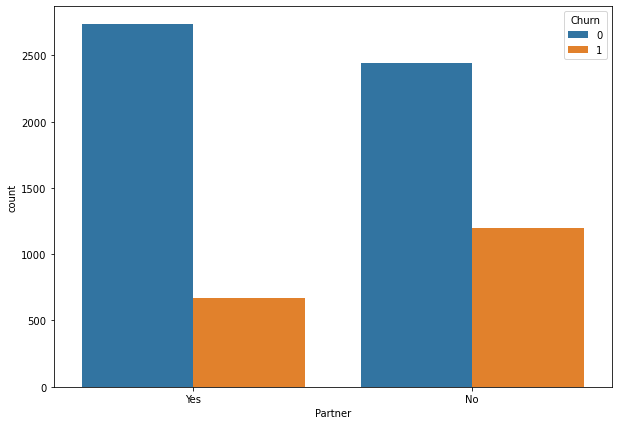

In [15]:
#making countplot to show the relation between churn and partners
plt.figure(figsize=(10,7))
sns.countplot(x="Partner",data=df,hue="Churn")

people who dont have partners have less chances of churn

persons who have partner having higher chances of churn as compare to single

<AxesSubplot:xlabel='Dependents', ylabel='count'>

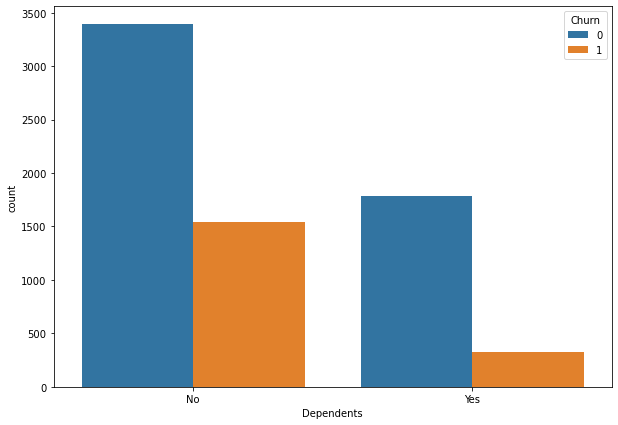

In [16]:
#making countplot to show the relation between churn and dependents
plt.figure(figsize=(10,7))
sns.countplot(x="Dependents",data=df,hue="Churn")

people who have dependents have higher chances of chuurn as compare to who dont have dependents

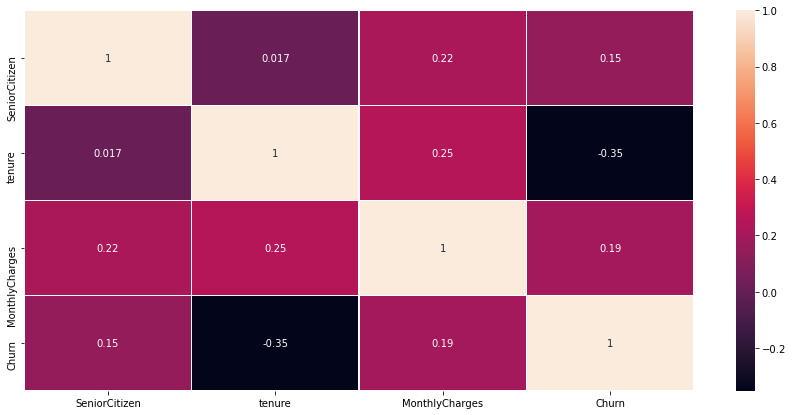

In [17]:
#making heatmap for multi variate analysis of data
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1)
plt.show()

In [18]:
#splitting the dependent & independent variables
df_x=df.drop(columns=["Churn"])
df_y=df["Churn"]
print(df_x.shape,df_y.shape)

(7043, 19) (7043,)


In [19]:
#getting dummies to convert independent variables into numeric
x=pd.get_dummies(df_x,drop_first=True)
x.shape

(7043, 6559)

In [20]:
#checking for null values in the new df
x.isnull().sum()

SeniorCitizen          0
tenure                 0
MonthlyCharges         0
gender_Male            0
Partner_Yes            0
                      ..
TotalCharges_997.75    0
TotalCharges_998.1     0
TotalCharges_999.45    0
TotalCharges_999.8     0
TotalCharges_999.9     0
Length: 6559, dtype: int64

In [21]:
#import usefull libraries and scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scx=sc.fit_transform(x)
sc_x=pd.DataFrame(scx,columns=x.columns)
sc_x.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_100.2,TotalCharges_100.25,TotalCharges_100.35,TotalCharges_100.4,TotalCharges_100.8,TotalCharges_100.9,TotalCharges_1001.2,TotalCharges_1001.5,TotalCharges_1003.05,TotalCharges_1004.35,TotalCharges_1004.5,TotalCharges_1004.75,TotalCharges_1005.7,TotalCharges_1006.9,TotalCharges_1007.8,TotalCharges_1007.9,TotalCharges_1008.55,TotalCharges_1008.7,TotalCharges_1009.25,TotalCharges_101.1,TotalCharges_101.45,TotalCharges_101.65,TotalCharges_101.9,TotalCharges_1010,TotalCharges_1011.05,TotalCharges_1011.5,TotalCharges_1011.8,TotalCharges_1012.4,TotalCharges_1013.05,TotalCharges_1013.2,TotalCharges_1013.35,TotalCharges_1013.6,TotalCharges_1014.25,TotalCharges_1016.7,TotalCharges_1017.35,TotalCharges_102.45,TotalCharges_102.5,TotalCharges_102.75,TotalCharges_1020.2,TotalCharges_1020.75,TotalCharges_1021.55,TotalCharges_1021.75,TotalCharges_1021.8,TotalCharges_1022.5,TotalCharges_1022.6,TotalCharges_1022.95,TotalCharges_1023.75,TotalCharges_1023.85,TotalCharges_1023.9,TotalCharges_1023.95,TotalCharges_1024,TotalCharges_1024.65,TotalCharges_1024.7,TotalCharges_1025.05,TotalCharges_1025.15,TotalCharges_1025.95,TotalCharges_1026.35,TotalCharges_1027.25,TotalCharges_1028.75,TotalCharges_1028.9,TotalCharges_1029.35,TotalCharges_1029.75,TotalCharges_1029.8,TotalCharges_103.7,TotalCharges_1031.1,TotalCharges_1031.4,TotalCharges_1031.7,TotalCharges_1032,TotalCharges_1032.05,TotalCharges_1033,TotalCharges_1033.9,TotalCharges_1033.95,TotalCharges_1035.5,TotalCharges_1035.7,TotalCharges_1036,TotalCharges_1036.75,TotalCharges_1037.75,TotalCharges_1039.45,TotalCharges_104.2,TotalCharges_104.3,TotalCharges_1041.8,TotalCharges_1042.65,TotalCharges_1043.3,TotalCharges_1043.35,TotalCharges_1043.4,TotalCharges_1043.8,TotalCharges_1045.25,TotalCharges_1046.1,TotalCharges_1046.2,TotalCharges_1046.5,TotalCharges_1047.7,TotalCharges_1048.45,TotalCharges_1048.85,TotalCharges_1049.05,TotalCharges_1049.6,TotalCharges_105.5,TotalCharges_105.6,TotalCharges_1050.5,TotalCharges_1051.05,TotalCharges_1051.9,TotalCharges_1052.35,TotalCharges_1052.4,TotalCharges_1054.6,TotalCharges_1054.75,TotalCharges_1054.8,TotalCharges_1055.9,TotalCharges_1056.95,TotalCharges_1057,TotalCharges_1057.55,TotalCharges_1057.85,TotalCharges_1058.1,TotalCharges_1058.25,TotalCharges_1058.6,TotalCharges_1059.55,TotalCharges_106.2,TotalCharges_106.55,TotalCharges_106.8,TotalCharges_106.85,TotalCharges_106.9,TotalCharges_1060.2,TotalCharges_1060.6,TotalCharges_1061.6,TotalCharges_1062.1,TotalCharges_1064.65,TotalCharges_1064.95,TotalCharges_1066.15,TotalCharges_1066.9,TotalCharges_1067.05,TotalCharges_1067.15,TotalCharges_1067.65,TotalCharges_1068.15,TotalCharges_1068.85,TotalCharges_107.05,TotalCharges_107.1,TotalCharges_107.25,TotalCharges_107.6,TotalCharges_1070.15,TotalCharges_1070.25,TotalCharges_1070.5,TotalCharges_1070.7,TotalCharges_1071.4,TotalCharges_1071.6,TotalCharges_1072,TotalCharges_1072.6,TotalCharges_1073.3,TotalCharges_1074.3,TotalCharges_1074.65,TotalCharges_1077.05,TotalCharges_1077.5,TotalCharges_1077.95,TotalCharges_1078.75,TotalCharges_1078.9,TotalCharges_1079.05,TotalCharges_1079.45,TotalCharges_1079.65,TotalCharges_108.05,TotalCharges_108.15,TotalCharges_108.65,TotalCharges_108.7,TotalCharges_108.95,TotalCharges_1080.55,TotalCharges_1081.25,TotalCharges_1081.45,TotalCharges_1082.75,TotalCharges_1082.8,TotalCharg

In [22]:
#now we consider the n_components and importing usefull library
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pc_x=pca.fit_transform(sc_x)

print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 0.865103601673554


In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
#balancing the data because data is inbalanced
rs=RandomUnderSampler(random_state=42)
x_res,y_res=rs.fit_resample(pc_x,df_y.values.ravel())

In [25]:
#checking thee shape of data after shapling
print('after underSampling, the shape of x : {}'.format(x_res.shape)) 
print('after underSampling, the shape of y : {} \n'.format(y_res.shape)) 
  
print("after underSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("after underSampling, counts of label '0': {}".format(sum(y_res == 0)))

after underSampling, the shape of x : (3738, 30)
after underSampling, the shape of y : (3738,) 

after underSampling, counts of label '1': 1869
after underSampling, counts of label '0': 1869


In [26]:
#checking data
y_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
#reshaping the data
y_res=y_res.reshape(-1,1)
y_res

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [28]:
#using train test split to get the metrics to getting the best r2 score
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf1=0
    rs=0
    for r_state in range(1,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=30)
        clf.fit(x_train,y_train)
        pred= clf.predict(x_test)
        temp=f1_score(y_test,pred)
        if temp>maxf1:
            maxf1=temp
            rs=r_state
    print('maximum f1_score is :',maxf1)
    print('confusion matrix ',confusion_matrix(y_test,pred))
    print('classification report', classification_report(y_test,pred))

In [29]:
#train the model to check to cross validation of result
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("mean f1 score is : ",cv.mean())

In [30]:
# using logistics regression to get the max r2 score
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
maxf1_score(lg,x_res,y_res)

maximum f1_score is : 0.9545454545454545
confusion matrix  [[ 7  2]
 [ 4 17]]
classification report               precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.89      0.81      0.85        21

    accuracy                           0.80        30
   macro avg       0.77      0.79      0.78        30
weighted avg       0.82      0.80      0.81        30



In [31]:
#cross validation of resul
cross_val(lg,x,df_y)

mean f1 score is :  0.5830758583828808


In [36]:
#hyper perameter tunnig and getting the best criteria
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_model=DecisionTreeClassifier()
model = GridSearchCV(dt_model, parameters, cv=5)
model.fit(x_res,y_res)
model.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [35]:
#using decision tree classifier to get the max f1 score

dtr= DecisionTreeClassifier(criterion="gini",max_depth=5)
maxf1_score(dtr,x_res,y_res)

maximum f1_score is : 0.9375
confusion matrix  [[ 8  1]
 [ 4 17]]
classification report               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.94      0.81      0.87        21

    accuracy                           0.83        30
   macro avg       0.81      0.85      0.82        30
weighted avg       0.86      0.83      0.84        30



In [48]:
#cross validation of resul
cross_val(dtr,x,df_y)

mean f1 score is :  0.5124603397588723


In [46]:
#finding the nearest neighbors for our model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
neighbors= {'n_neighbors':range(1,50)}

model=GridSearchCV(knn,neighbors,cv=5)
model.fit(x_res,y_res)
model.best_params_

{'n_neighbors': 40}

In [47]:
#using knearest clasfier to get max f1 score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=40)
maxf1_score(knn,x_res,y_res)

maximum f1_score is : 0.9333333333333333
confusion matrix  [[ 6  3]
 [ 3 18]]
classification report               precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.86      0.86      0.86        21

    accuracy                           0.80        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.80      0.80      0.80        30



In [49]:
#cross validation of resul
cross_val(knn,x,df_y)

mean f1 score is :  0.5190525737353179


In [53]:
#getting the best estimator by using grid search cv
from sklearn.ensemble import RandomForestClassifier

parameter = {'n_estimators' : [1,10,100]}
rf_model= RandomForestClassifier()
model= GridSearchCV(rf_model,parameter, cv=5)
model.fit(x_res,y_res)
model.best_params_

{'n_estimators': 100}

In [55]:
#getting max f1 score by using random forest classifier
rf = RandomForestClassifier(n_estimators= 100)
maxf1_score(rf,x_res,y_res)

maximum f1_score is : 0.9545454545454545
confusion matrix  [[ 7  2]
 [ 4 17]]
classification report               precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.89      0.81      0.85        21

    accuracy                           0.80        30
   macro avg       0.77      0.79      0.78        30
weighted avg       0.82      0.80      0.81        30



In [56]:
#checking cross validation score for rando forest regressor
cross_val(rf,x,df_y)

mean f1 score is :  0.5297504614243586


In [57]:
#saving the model
import joblib
joblib.dump(lg, 'churn_prediction')

['churn_prediction']

In [58]:
#fetching saved model to predict churn posibility
model = joblib.load('churn_prediction')

In [62]:
#getting the best score
pred=model.predict(x_res)
print(maxf1_score(rf,y_res,pred)*100)

maximum f1_score is : 0.9545454545454545
confusion matrix  [[ 7  4]
 [ 2 17]]
classification report               precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.81      0.89      0.85        19

    accuracy                           0.80        30
   macro avg       0.79      0.77      0.78        30
weighted avg       0.80      0.80      0.80        30



TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [63]:
#predicting the possibilities by putting formula in the dataframe
prediction = pd.DataFrame(pred)

In [64]:
#predicting the possibilities
prediction.to_csv('final.csv')
prediction

,0
0,0
1,0
2,1
3,0
4,1
...,...
3733,1
3734,1
3735,1
3736,0
